#Result comparison

Output obtained from the study is put into the numpy arrays so that they can be plotted and compared.  

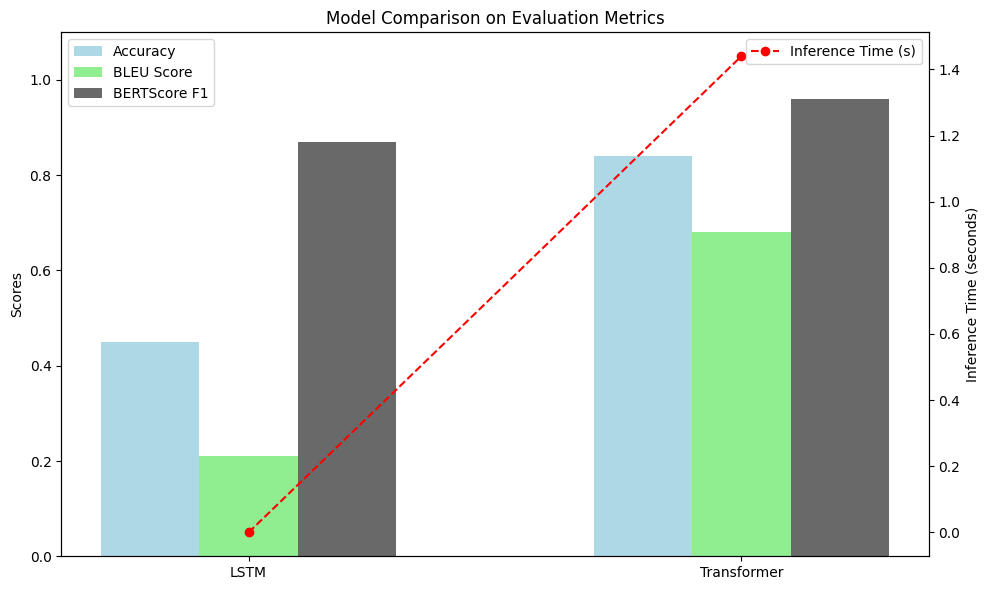

In [1]:
import matplotlib.pyplot as plt
import numpy as np

models_chatbot = ['LSTM', 'Transformer']
accuracy = [0.45, 0.84]
bleu = [0.21, 0.68]
bertscore_f1 = [0.87, 0.96]
inference_time = [0.0, 1.44]


x = np.arange(len(models_chatbot))
width = 0.2

fig, ax1 = plt.subplots(figsize=(10,6))


rects1 = ax1.bar(x - width, accuracy, width, label='Accuracy', color = 'lightblue')
rects2 = ax1.bar(x, bleu, width, label='BLEU Score', color = 'lightgreen')
rects3 = ax1.bar(x + width, bertscore_f1, width, label='BERTScore F1', color='dimgray')

ax1.set_ylabel('Scores')
ax1.set_title('Model Comparison on Evaluation Metrics')
ax1.set_xticks(x)
ax1.set_xticklabels(models_chatbot)
ax1.set_ylim(0, 1.1)
ax1.legend(loc='upper left')

# Plot Inference Time on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(models_chatbot, inference_time, color='red', marker='o', linestyle='--', label='Inference Time (s)')
ax2.set_ylabel('Inference Time (seconds)')
ax2.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()


In the below section of the code the whole output files (containing the metrics for each questions in the test dataset for both the LSTM and Transformer) are uploaded and then checked for their shape.

In [5]:
import ast
import numpy as np

lstm_output_path = "/content/LSTM_test_output.txt"
transformer_output_path = "/content/Transformers_test_output.txt"

def load_metrics(file_path):
    with open(file_path, 'r') as f:
        data = ast.literal_eval(f.read())
    exact_match = [item['ExactMatch'] for item in data]
    bleu = [item['BLEU'] for item in data]
    time_taken = [item['TimeTaken'] for item in data]
    return np.array(exact_match), np.array(bleu), np.array(time_taken)

exact_lstm, bleu_lstm, time_lstm = load_metrics(lstm_output_path)
exact_trf, bleu_trf, time_trf = load_metrics(transformer_output_path)

print("LSTM ExactMatch:", exact_lstm.shape)
print("Transformer ExactMatch:", exact_trf.shape)
print("LSTM ExactMatch:", bleu_lstm.shape)
print("Transformer ExactMatch:", bleu_trf.shape)
print("LSTM ExactMatch:", time_lstm.shape)
print("Transformer ExactMatch:", time_trf.shape)


LSTM ExactMatch: (172,)
Transformer ExactMatch: (172,)
LSTM ExactMatch: (172,)
Transformer ExactMatch: (172,)
LSTM ExactMatch: (172,)
Transformer ExactMatch: (172,)


**Hypothesis Testing**

Once loaded and their shape checked the metrics of all the questions and answers set, next step is to check that if the data is normally distributed or not. There are two ways to do that.

  First by plotting them and
  second using shapiro test.

It is important to know beforehand about the normality of the data as this would help further in choosing the technique to perform hypothesis testing. For normally distributed data typicall t-test is employed otherwise Wilcoxon can be used.

Below results indicates that the data is not *normally distributed* and thus Wilcoxon was applied to the metrics. The rule of the Wilcoxon test is that if the p value is less than 0.001 then hypothesis can be rejected else it is accepted.

**Output**

Below results indicates that the data is not *normally distributed* and thus Wilcoxon was applied to the metrics.

p-value came out be be less than 0.001 thus null hypotheis can be rejected. Which further supports that the transformer-based architecture performed efficiently and accurately as compared to LSTM in this setup (context) of experiment within the domain of specific DBS dataset.





.....................Hypothesis Testing ................................
Null Hypothesis: The Transformer-based architecture does not perform better than the LSTM-based architecture on 
 the DBS chatbot task (i.e., there is no statistically significant difference in Accuracy, BLEU Score, or BERTScore between the two models)
Alternative Hypothesis:The Transformer-based architecture does perform better than the LSTM-based architecture on the DBS chatbot task

First Checking for normality of the data using Shapiro test and then based on it, hypothesis test will be chosen

 Exact Match = Normality p-value (Shapiro): 0.0000
Differences NOT normally distributed: using Wilcoxon signed-rank test
Wilcoxon p-value = 0.0000
Reject null hypothesis

 BLEU = Normality p-value (Shapiro): 0.0000
Differences NOT normally distributed: using Wilcoxon signed-rank test
Wilcoxon p-value = 0.0000
Reject null hypothesis

 Inference Time = Normality p-value (Shapiro): 0.0000
Differences NOT normally distribut

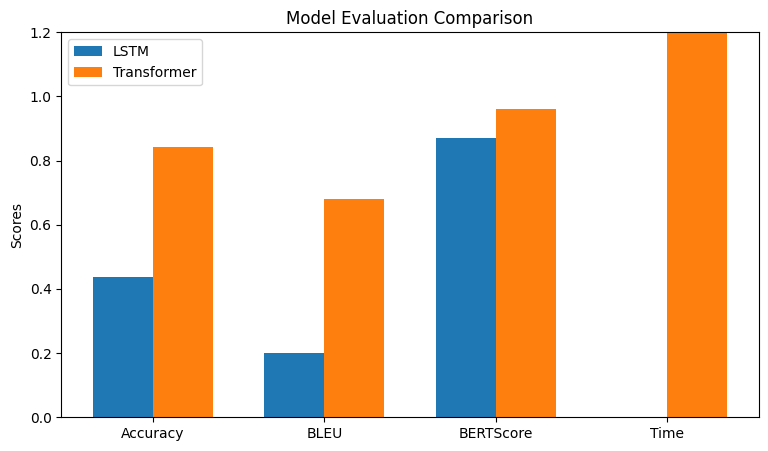

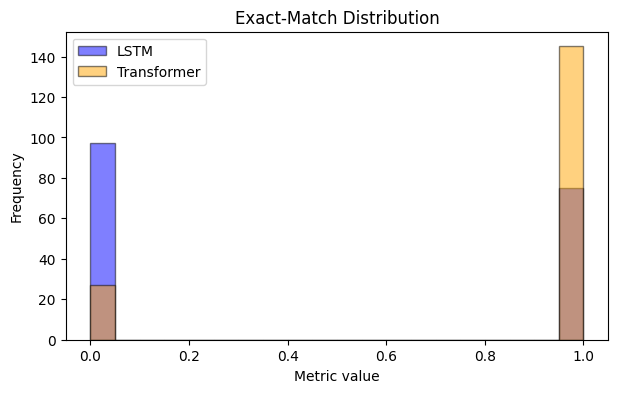

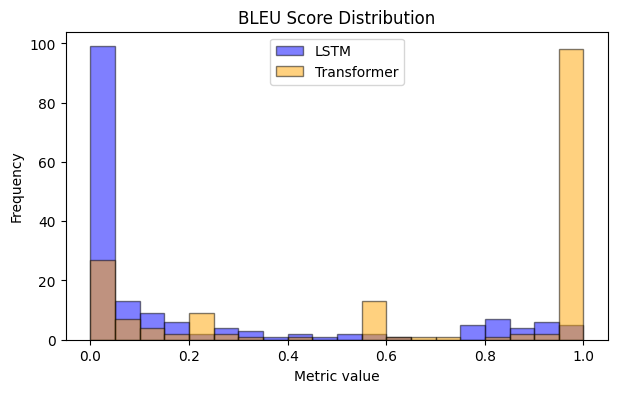

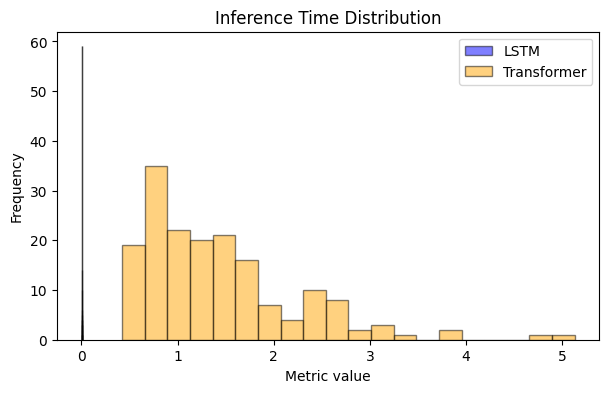

In [14]:
from scipy.stats import ttest_rel, wilcoxon, shapiro

h0 = "The Transformer-based architecture does not perform better than the LSTM-based architecture on \n the DBS chatbot task (i.e., there is no statistically significant difference in Accuracy, BLEU Score, or BERTScore between the two models)"
h1 = "The Transformer-based architecture does perform better than the LSTM-based architecture on the DBS chatbot task"

'''
Null Hypothesis (H₀): The Transformer-based architecture does not perform better than the LSTM-based architecture on the
DBS chatbot task (i.e., there is no statistically significant difference in Accuracy, BLEU Score, or BERTScore between the two models).
'''

def check_and_test(a, b, metric_name):
    diff = a - b
    stat_normal, p_normal = shapiro(diff)

    print(f"\n {metric_name} = Normality p-value (Shapiro): {p_normal:.4f}")

    if p_normal > 0.05:
        print("Differences are normally distributed: using paired t-test")
        t_stat, p_val = ttest_rel(a, b)
        print(f"t-test p-value = {p_val:.4f}")
    else:
        print("Differences NOT normally distributed: using Wilcoxon signed-rank test")
        w_stat, p_val = wilcoxon(a, b)
        print(f"Wilcoxon p-value = {p_val:.4f}")
        if p_val < 0.001:
            print("Reject null hypothesis")
        else:
            print("Fail to reject null hypothesis")


print(f"\n.....................\033[1mHypothesis Testing\033[0m ................................")

print(f"\033[1mNull Hypothesis:\033[0m {h0}")
print(f"\033[1mAlternative Hypothesis:\033[0m{h1}")

print(f"\nFirst Checking for normality of the data using Shapiro test and then based on it, hypothesis test will be chosen")

check_and_test(exact_trf, exact_lstm, "Exact Match")
check_and_test(bleu_trf, bleu_lstm, "BLEU")
check_and_test(time_trf, time_lstm, "Inference Time")


labels = ['Accuracy', 'BLEU', 'BERTScore', 'Time']
avg_lstm = [exact_lstm.mean(), bleu_lstm.mean(), 0.87, time_lstm.mean()]
avg_trf  = [exact_trf.mean(),  bleu_trf.mean(),  0.96, time_trf.mean()]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(9,5))
rects1 = ax.bar(x - width/2, avg_lstm, width, label='LSTM')
rects2 = ax.bar(x + width/2, avg_trf,  width, label='Transformer')

ax.set_ylabel('Scores')
ax.set_title('Model Evaluation Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

plt.ylim(0,1.2)
plt.show()



def plot_hist(metric_lstm, metric_trf, title, bins=20):
    plt.figure(figsize=(7,4))
    plt.hist(metric_lstm, bins=bins, alpha=0.5,  label='LSTM', color='blue', edgecolor='black')
    plt.hist(metric_trf,  bins=bins, alpha=0.5,  label='Transformer', color='orange', edgecolor='black')
    plt.title(title)
    plt.legend()
    plt.xlabel('Metric value')
    plt.ylabel('Frequency')
    plt.show()

plot_hist(exact_lstm, exact_trf, "Exact-Match Distribution")
plot_hist(bleu_lstm, bleu_trf, "BLEU Score Distribution")
plot_hist(time_lstm, time_trf, "Inference Time Distribution")
